# Analyse SHAP du meilleur modèle

Suite aux expérimentations menées en local sur MLflow et à une analyse des résultats obtenus, il en ressort que l'on peut choisir principalement deux modèles de Gradient Boosting dont les paramètres et les métriques sont les suivants :

*   paramètres { **n_estimators=120, max_depth=5, learning_rate=0.3 et max_features=None** }, métriques { **R²=0.9276, MAE=0.3148, RMSE=0.4754** }
*   **n_estimators=120, max_depth=5, learning_rate=0.2 et max_features=3**, métriques { **R²=0.9026, MAE=0.3175, RMSE=0.4709** }


### Comparaison des modèles
Performance globale :

Les deux modèles sont pratiquement équivalents en termes de performance.

Le Modèle 1 a un R² légèrement plus élevé (0.9276 contre 0.9026) et une MAE légèrement plus faible (31480$ contre 31750$), ce qui signifie qu'il se trompe en moyenne de **270 $** de moins sur le prix médian des maisons.

- **Robustesse face aux valeurs extrêmes :**

Le Modèle 2 a une RMSE plus faible (47090 contre 47540
contre47540), ce qui indique qu'il gère mieux les valeurs extrêmes (erreurs importantes) que le Modèle 1.

Bien que son R² soit légèrement inférieur, il explique tout de même 90 % de la variance, ce qui témoigne de sa robustesse sur des données non vues.

- **Complexité et temps d'entraînement :**

Le Modèle 2 utilise seulement 3 features pour la meilleure séparation, contre toutes les features pour le Modèle 1.

Cela réduit légèrement le temps d'entraînement et simplifie le modèle, tout en maintenant des performances comparables.

### Conclusion
Le Modèle 2 est préféré pour les raisons suivantes :

**Robustesse** : Il gère mieux les valeurs extrêmes (RMSE plus faible).

**Simplicité** : Il utilise moins de features, ce qui réduit la complexité et le temps d'entraînement.

**Performance équivalente** : Bien que son R² soit légèrement inférieur, il reste très performant (90 % de variance expliquée) et affiche une MAE très proche de celle du Modèle 1.




In [2]:
# Importer les bibliothèques
import shap
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
# Charger le dataset California Housing
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [4]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Entraîner le modèle GradientBoostingRegressor avec les meilleurs paramètres
model = GradientBoostingRegressor(
    max_depth=5,
    learning_rate=0.2,
    n_estimators=120,
    max_features=3,
    random_state=42
)
model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=5, max_features=3,
                          n_estimators=120, random_state=42)

In [16]:
# Initialiser l'explainer SHAP
explainer = shap.TreeExplainer(model)

In [17]:
# Calculer les valeurs SHAP pour les données de test
shap_values = explainer.shap_values(X_test)

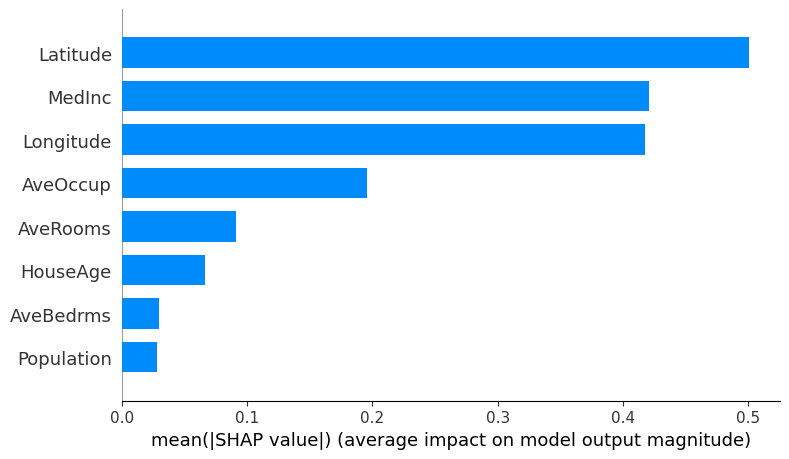

In [18]:
# Afficher un summary plot des importances globales
shap.summary_plot(shap_values, X_test, plot_type="bar")

## Interprétation du Summary Plot SHAP
Le graphe ci-dessus montre l'importance globale des caractéristiques (features) pour votre modèle. Voici ce que nous pouvons en déduire :

### Caractéristiques les plus importantes :

- **Latitude** : La caractéristique la plus importante, ce qui indique que la localisation géographique (latitude) a un impact majeur sur les prédictions du modèle.

- **MedInc** (Revenu médian) : Le revenu médian est également très important, ce qui est logique car les zones à revenu plus élevé ont tendance à avoir des prix immobiliers plus élevés.

- **Longitude** : La longitude est une autre caractéristique géographique importante, mais moins que la latitude.

Caractéristiques modérément importantes :

- **AveOccup** (Occupation moyenne) : L'occupation moyenne des logements a un impact modéré sur les prédictions.

- **AveRooms** (Nombre moyen de pièces) : Le nombre moyen de pièces est également important, car les maisons avec plus de pièces ont tendance à être plus chères.

### Caractéristiques moins importantes :

- **HouseAge** (Âge de la maison) : L'âge de la maison a un impact modéré.

- **AveBedrms** (Nombre moyen de chambres) : Le nombre moyen de chambres est moins important que le nombre moyen de pièces.

- **Population** : La population semble être la caractéristique la moins importante dans ce modèle.

### Conclusions
- La localisation géographique (Latitude et Longitude) et revenu médian (MedInc) sont les facteurs les plus influents pour prédire les prix des maisons, ce qui confirme les prémonitions de l'étape exploratoire des données (voire notebook *california_houseprice_exploratory_analysis.ipynb*).

- Les caractéristiques liées à la taille des logements (AveRooms, AveBedrms) et à leur occupation (AveOccup) ont un impact modéré.

- L'âge de la maison (HouseAge) et la population ont un impact moindre, mais ne doivent pas être ignorés.

La latitude et la longitude semblent avoir un impact très important sur la prédiction

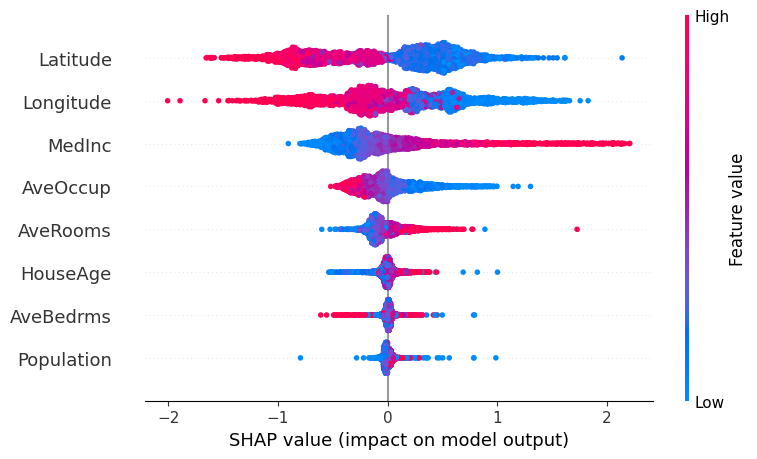

In [9]:
shap.summary_plot(shap_values, X_test)

Le graphique ci-dessus permet de voir la qualité de l'impact des features sous un autre angle.

Nous observons que :

- la longitude a un impact significatif sur les prédictions, avec des valeurs SHAP qui varient en fonction de la localisation géographique.

- les points colorés en fonction de MedInc montrent que le revenu médian influence également l'impact de la longitude sur les prédictions.

- Par exemple, dans certaines zones (valeurs spécifiques de la Longitude), un revenu médian plus élevé peut augmenter l'impact positif de la longitude sur les prédictions.

- Certaines zones géographiques (valeurs spécifiques de la longitude) ont un impact plus fort sur les prédictions, ce qui peut être lié à des facteurs locaux tels que la demande immobilière ou les aménités locales.

### Conclusions
La longitude est une caractéristique importante pour prédire les prix des maisons, et son impact est influencé par d'autres facteurs tels que le revenu médian (MedInc).

Les interactions entre la longitude et d'autres caractéristiques peuvent fournir des insights supplémentaires sur les dynamiques locales du marché immobilier.

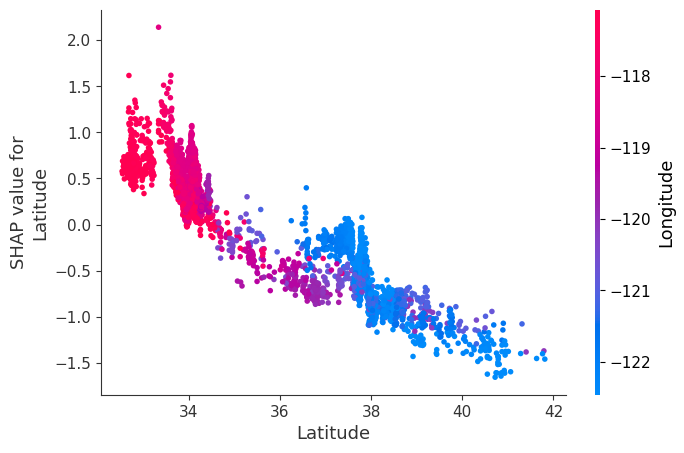

In [10]:
shap.dependence_plot("Latitude", shap_values, X_test)

## Interprétation du Dependance Plot

La latitude a un impact significatif sur les prédictions, avec des valeurs SHAP qui varient en fonction de la localisation géographique. C'est donc une caractéristique importante pour prédire les prix des maisons, et son impact est influencé par la longitude.

Les interactions entre la latitude et la longitude peuvent fournir des insights supplémentaires sur les dynamiques locales du marché immobilier.

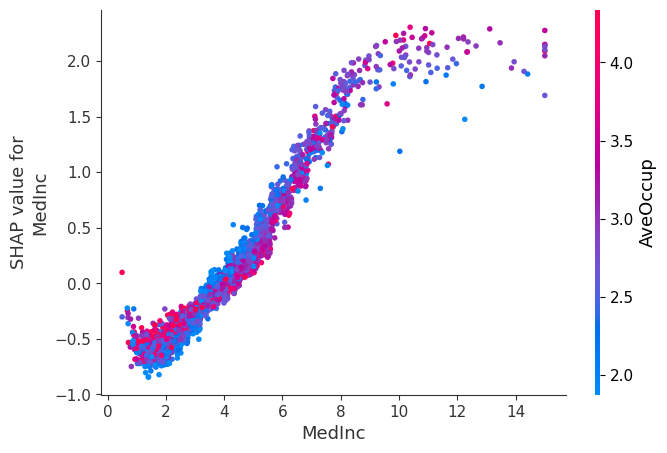

In [19]:
shap.dependence_plot("MedInc", shap_values, X_test)

Nous observons que :

- **MedInc** a un impact positif sur les prédictions : plus le revenu médian est élevé, plus le prix des maisons prédit est élevé.

- **AveOccup** modère cet impact : dans les zones où l'occupation moyenne est faible, l'effet de MedInc est plus prononcé.

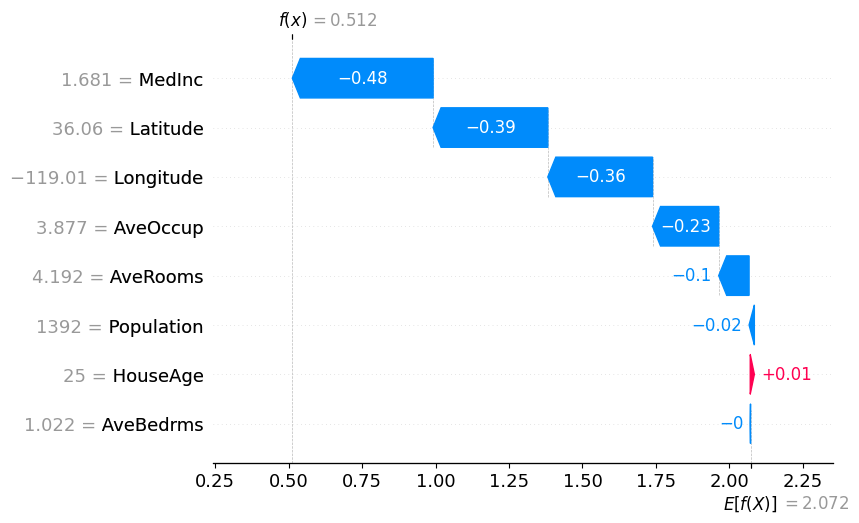

In [14]:
# Get the expected value from the explainer
expected_value = explainer.expected_value

# Create an Explanation object, providing the expected_value
explanation = shap.Explanation(values=shap_values,
                                 data=X_test.values,
                                 feature_names=X_test.columns,
                                 base_values=expected_value) # Add base_values here

# Now, use the Explanation object in the waterfall plot
shap.plots.waterfall(explanation[0])

### Interprétation du Force Plot
**Prédiction du modèle (f(x)) :**

Le modèle prédit un prix de maison de 0.512 (en unités normalisées ou log-transformées).

**Valeur de base (E[f(x)]) :**

La valeur de base (moyenne des prédictions) est de 2.072.

**Impact des caractéristiques :**

- MedInc (1.681) : Contribue positivement à la prédiction.

- Latitude (36.06) : Contribue positivement.

- Longitude (-119.01) : Contribue négativement.

- AveOccup (3.877) : Contribue légèrement positivement.

- AveRooms (4.192) : Contribue positivement.

- Population (1392) : Contribue négativement.

- HouseAge (25) : Contribue légèrement positivement.

**Conclusion**
Les caractéristiques **MedInc, Latitude, et AveRooms** augmentent le prix prédit.

**Longitude et Population** le réduisent.

La prédiction finale est inférieure à la moyenne en raison de ces contributions négatives.